<h1>Reto Hackathon</h1>
<h2>Integrantes</h2>
<ul>
  <li>Juan Pablo Abril Serna</li>
  <li>Mayerly Castillo Hidalgo</li>
  <li>Wilson Hernández Ortiz</li>
  <li>Deiby Zair Melo Olivar</li>
  <li>Santiago Niño Campos</li>
</ul>

# Librerías e importación de base

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Deiby-Zair/hackhaton-sic/main/jobs_in_data.csv")

# Exploración de datos

In [ ]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


## Datos Faltantes

In [ ]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

La base de datos no tiene elementos nulos

## Datos Duplicados

In [ ]:
print('Hay',df.duplicated().sum(), 'Filas duplicadas')

Hay 4014 Filas duplicadas


In [ ]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
print('Luego de eliminar las filas duplicadas el df queda con', df.shape[0], 'Filas')

Luego de eliminar las filas duplicadas el df queda con 5341 Filas


En la base de datos contamos con 2 variables: "Salary" y "Salary_in_usd"; en la primera tenemos el salario del profesional en el tipo de moneda con que se ingresó la información (Euros, Dólares, ...) mientras que la segunda variable representa el valor de "Salary" con conversión de todas las monedas a USD.

**Por ello continuaremos trabajando con sólo la variable "Salary_in_usd"  descartamos las variables: "Salary" y "Salary_currency"**

In [ ]:
columns_to_remove = ["salary_currency", "salary"]
df = df.drop(columns_to_remove, axis=1)

In [ ]:
df.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M


In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['work_year', 'salary_in_usd'], dtype='object')

In [ ]:
for column in df.columns:
    if column not in numeric_columns:
        print(column, "tiene", df[column].nunique(), "valores diferentes")

job_title tiene 125 valores diferentes
job_category tiene 10 valores diferentes
employee_residence tiene 83 valores diferentes
experience_level tiene 4 valores diferentes
employment_type tiene 4 valores diferentes
work_setting tiene 3 valores diferentes
company_location tiene 70 valores diferentes
company_size tiene 3 valores diferentes


In [ ]:
pd.DataFrame(df.employment_type.value_counts(normalize=True)*100).reset_index()

,employment_type,proportion
0,Full-time,99.157461
1,Contract,0.355739
2,Part-time,0.280846
3,Freelance,0.205954


El tipo de empleo se muestra que en un 99.18% (aprox. el 100%) son Full-Time, se ignora como variable ya que el peso de esta variable recae principalmente sobre una entrada.

Se elimina la variable "work_year" la cual representa el año en que fue tomado el dato, para efectos de estudios y proyecciones con el tiempo se consideraría, sin embargo, para esta ocasión esta variable no representa valor y por lo anterior se elimina.


In [ ]:
columns_to_remove = ["employment_type", "work_year"]
df = df.drop(columns_to_remove, axis=1)

## Analisis Descriptivo

In [ ]:
df.salary_in_usd.describe()

count      5341.000000
mean     146258.409099
std       66594.117529
min       15000.000000
25%       98506.000000
50%      140000.000000
75%      186000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

* El valor del salario es anual
* La descripción del dataset en Kaggle orienta todas las variables hacia el salario


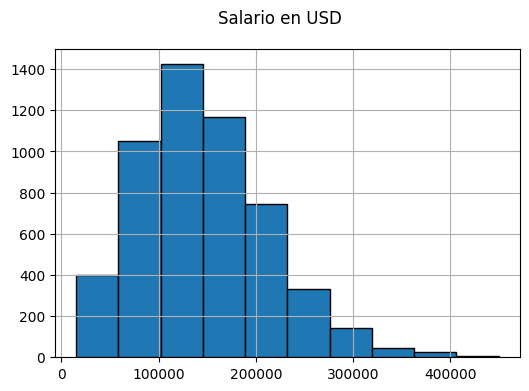

In [ ]:
df["salary_in_usd"].hist(figsize=(6, 4), bins=10, edgecolor='black')
plt.suptitle('Salario en USD')
plt.show()

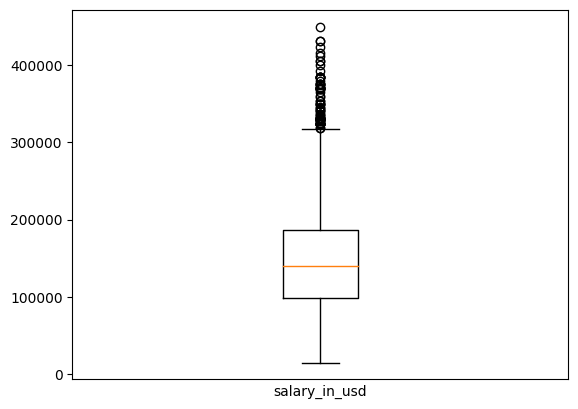

In [ ]:
plt.boxplot(df.salary_in_usd)
plt.xlabel('salary_in_usd')
plt.xticks([])
plt.show()

In [ ]:
Q1 = df.salary_in_usd.quantile(0.25)
Q3 = df.salary_in_usd.quantile(0.75)
IQR = Q3 - Q1
outliers = df[((df.salary_in_usd < (Q1 - 1.5 * IQR)) | (df.salary_in_usd > (Q3 + 1.5 * IQR)))]
print("Valores atípicos:\n", len(outliers))

Valores atípicos:
 77


In [ ]:
outliers.job_category.value_counts(normalize=True)*100

job_category
Machine Learning and AI           40.259740
Data Science and Research         33.766234
Leadership and Management          9.090909
Data Engineering                   7.792208
Data Analysis                      5.194805
Data Architecture and Modeling     3.896104
Name: proportion, dtype: float64

Se encuentran 77 filas con datos atípicos en la variable salary_in_usd realizando un análisis sobre estos outliers se encuentra que el 73% de los datos pertenecen a las categorías "Machine Learning and AI" y "Data Science and Research"

In [ ]:
print('El peso de los outliers sobre el total de la base es: ', outliers.shape[0]/df.shape[0]*100)

El peso de los outliers sobre el total de la base es:  1.4416775884665793


los outliers representan aprox. el 1.5% del total de la base, al ser valores atípicos se porcede a eliminarlos

In [ ]:
df=df[((df.salary_in_usd >= (Q1 - 1.5 * IQR)) & (df.salary_in_usd <= (Q3 + 1.5 * IQR)))]

In [ ]:
print('Luego de eliminar los valores atípicos en la variable salary_in_usd, el df queda con ', df.shape[0], ' Filas')

Luego de eliminar los valores atípicos en la variable salary_in_usd, el df queda con  5264  Filas


## Análisis de Variables Categóricas

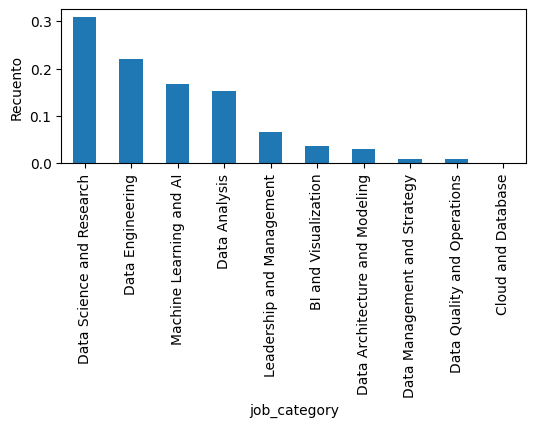

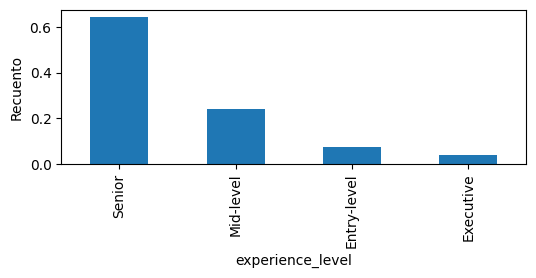

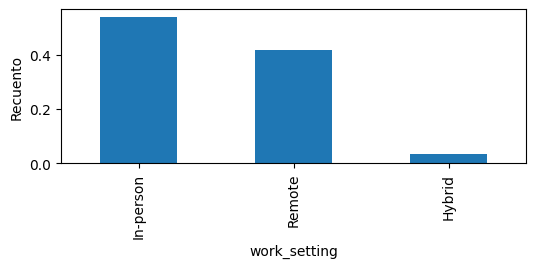

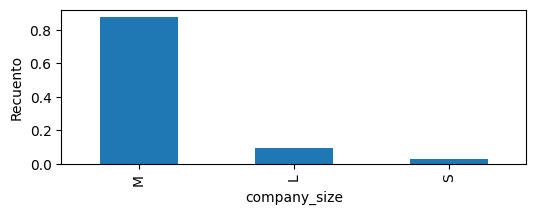

In [ ]:
for column in df.columns:
    if column not in numeric_columns and df[column].nunique() < 20:
        value_counts = df[column].value_counts(normalize=True)
        plt.figure(figsize=(6, 2))
        value_counts.plot(kind='bar')
        plt.xlabel(column)
        plt.ylabel('Recuento')
        plt.show()

Se observa en "Company_size" una mayor distribución hacía compañias de tamaño "M"

In [ ]:
df.company_size.value_counts(normalize=True)*100

company_size
M    87.803951
L     9.213526
S     2.982523
Name: proportion, dtype: float64

Esta entrada representa el 87% de la variable, para evitar sesgos en el modelo es preferible eliminarla

In [ ]:
df.job_title.nunique()

123

In [ ]:
columns_to_remove = ["job_title"]#, "company_size"]
df = df.drop(columns_to_remove, axis=1)

La variable "job_title" posee un amplio número de entradas por lo que la especificidad de la información es muy alta, usaremos en su lugar la variable "job_category" para el modelo.

In [ ]:
df_not_encoding = df[["salary_in_usd"]].copy();

# Umbral para agrupar categorías
threshold = 0.01

for column in df.columns:
    if column not in numeric_columns:
      category_counts = df[column].value_counts(normalize=True)
      df_not_encoding[column] = df[column].apply(lambda x: x if category_counts[x] > threshold else 'Otros')

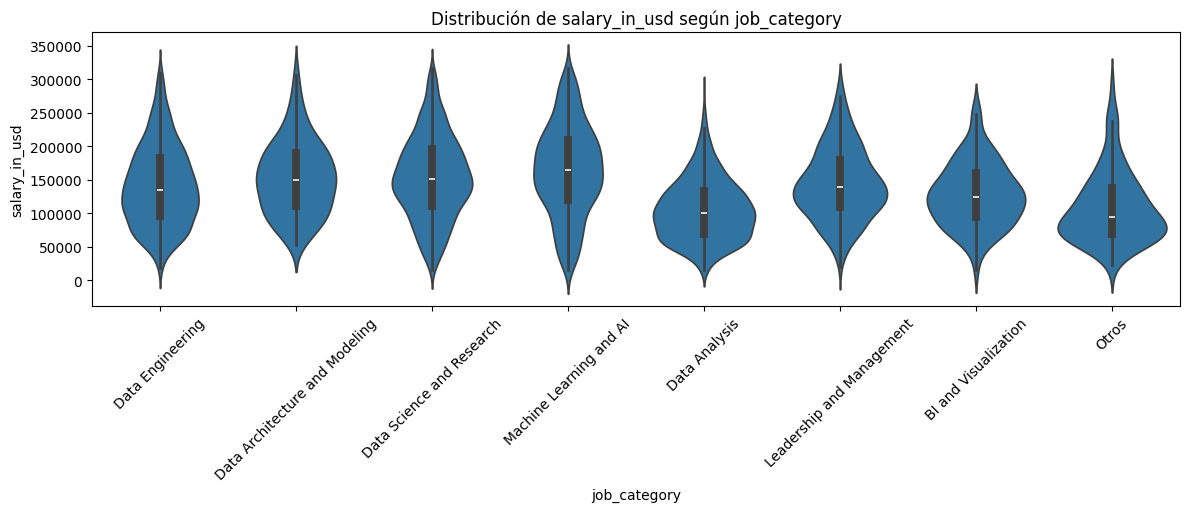

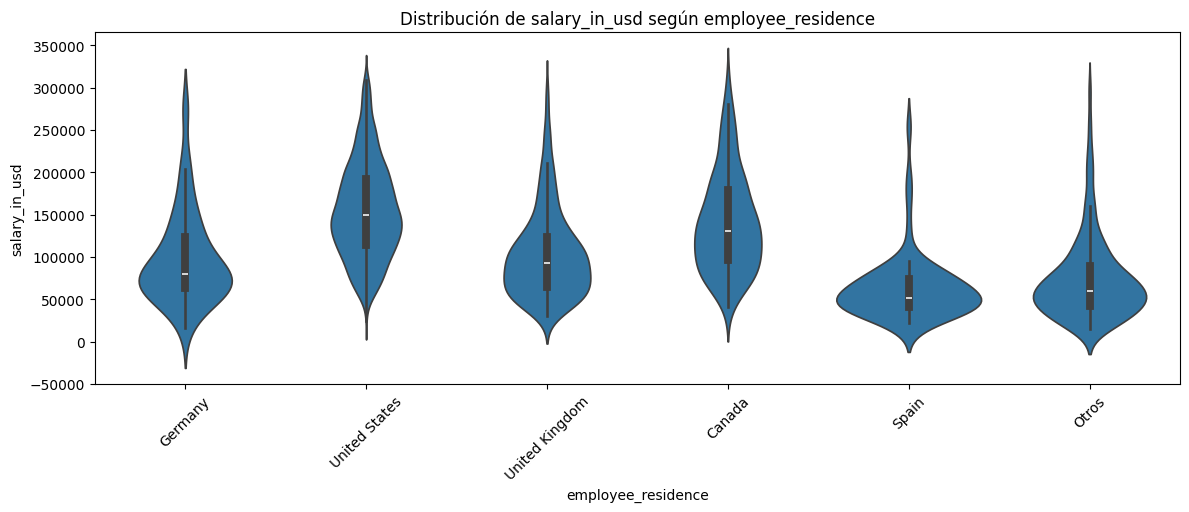

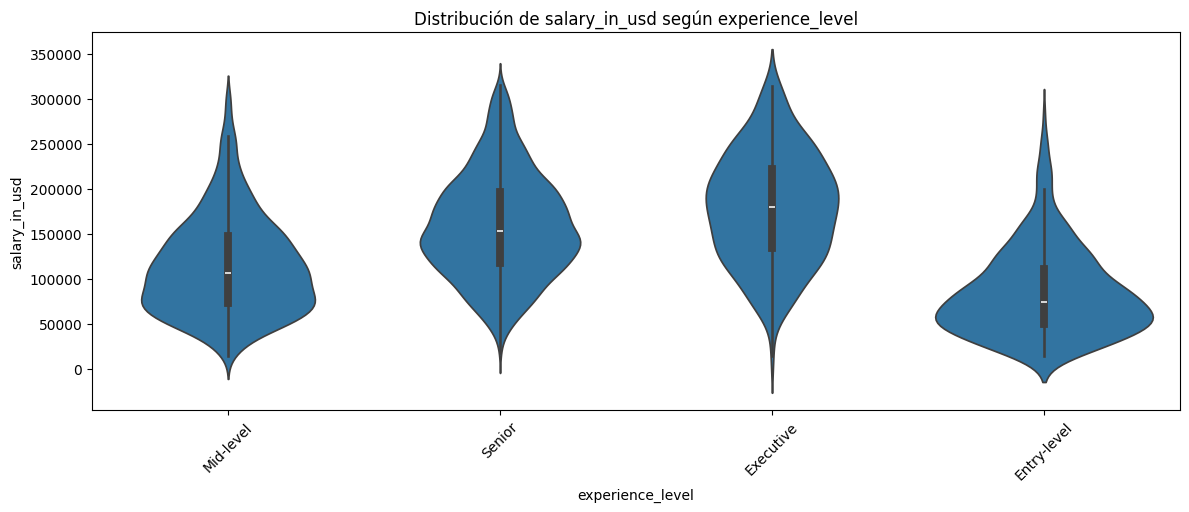

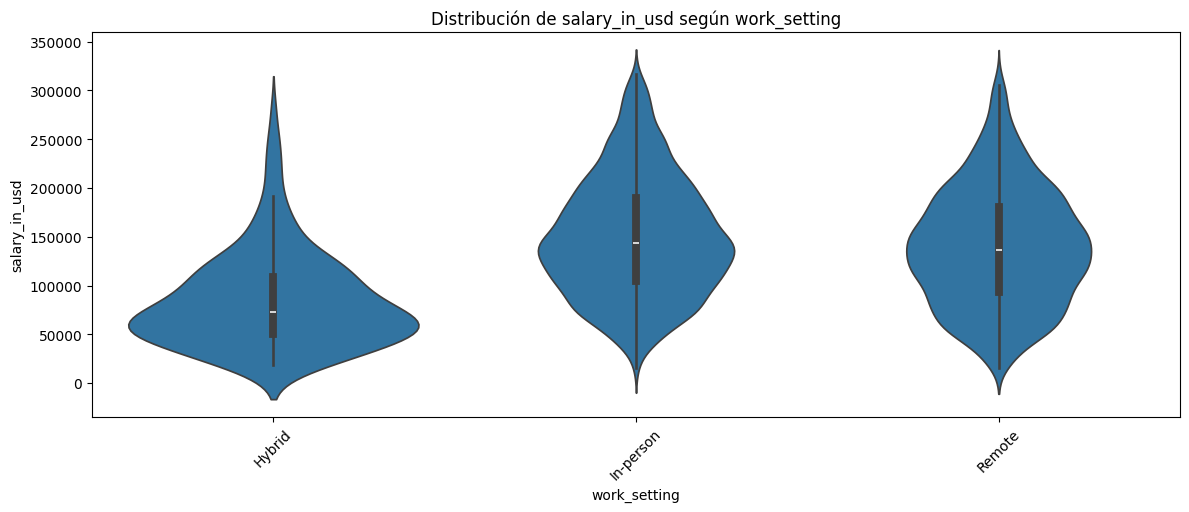

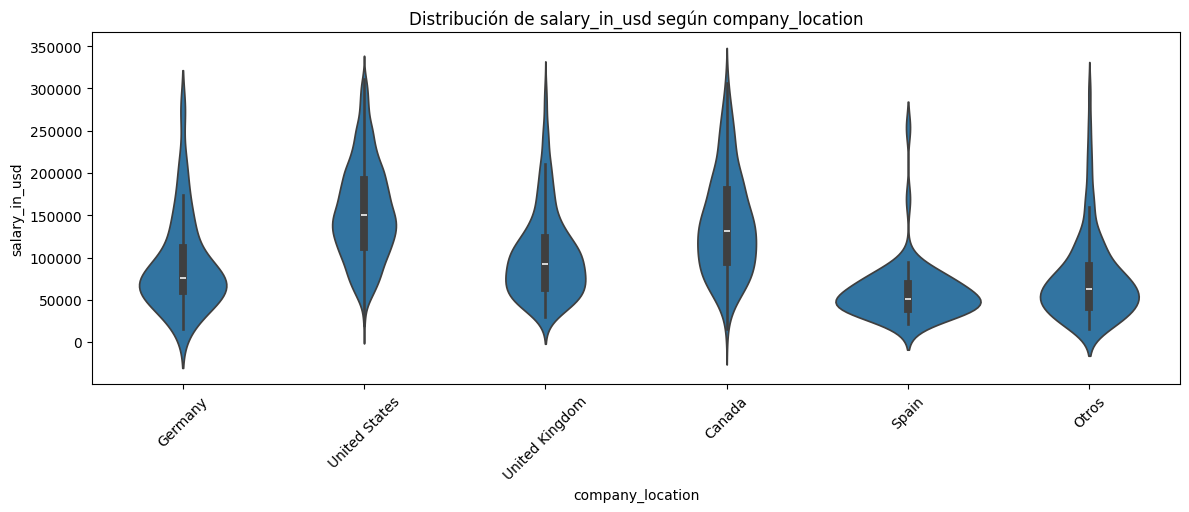

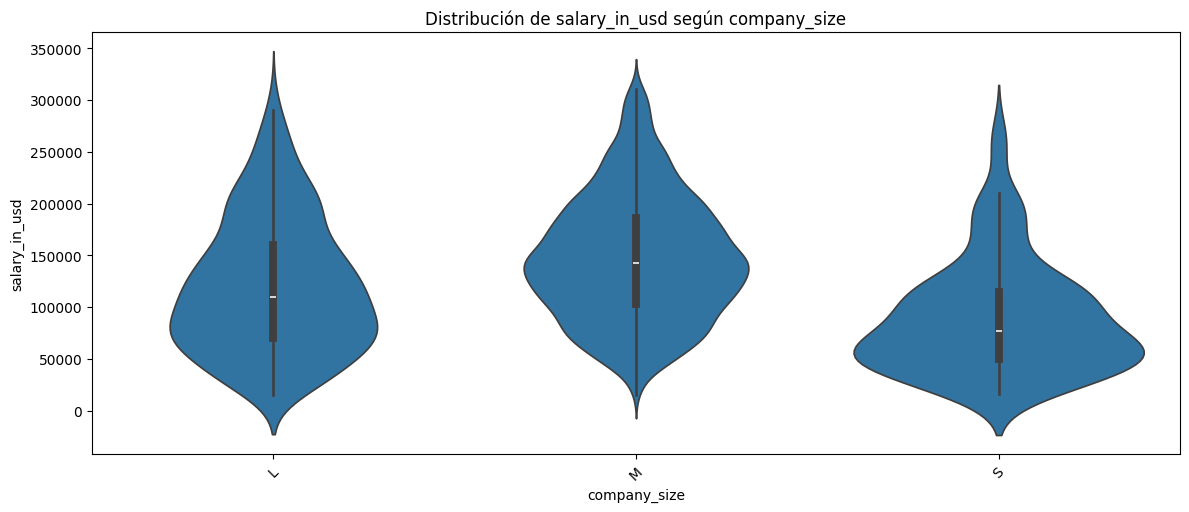

In [ ]:
for column in df.columns:
    if column not in numeric_columns:
      category_grouped_counts = df_not_encoding[column].value_counts(normalize=True)
      plt.figure(figsize=(12, 5))
      sns.violinplot(data=df_not_encoding, x=column, y="salary_in_usd")
      plt.xticks(rotation=45)
      plt.tight_layout()
      plt.title('Distribución de salary_in_usd según '+ column)
      plt.show()

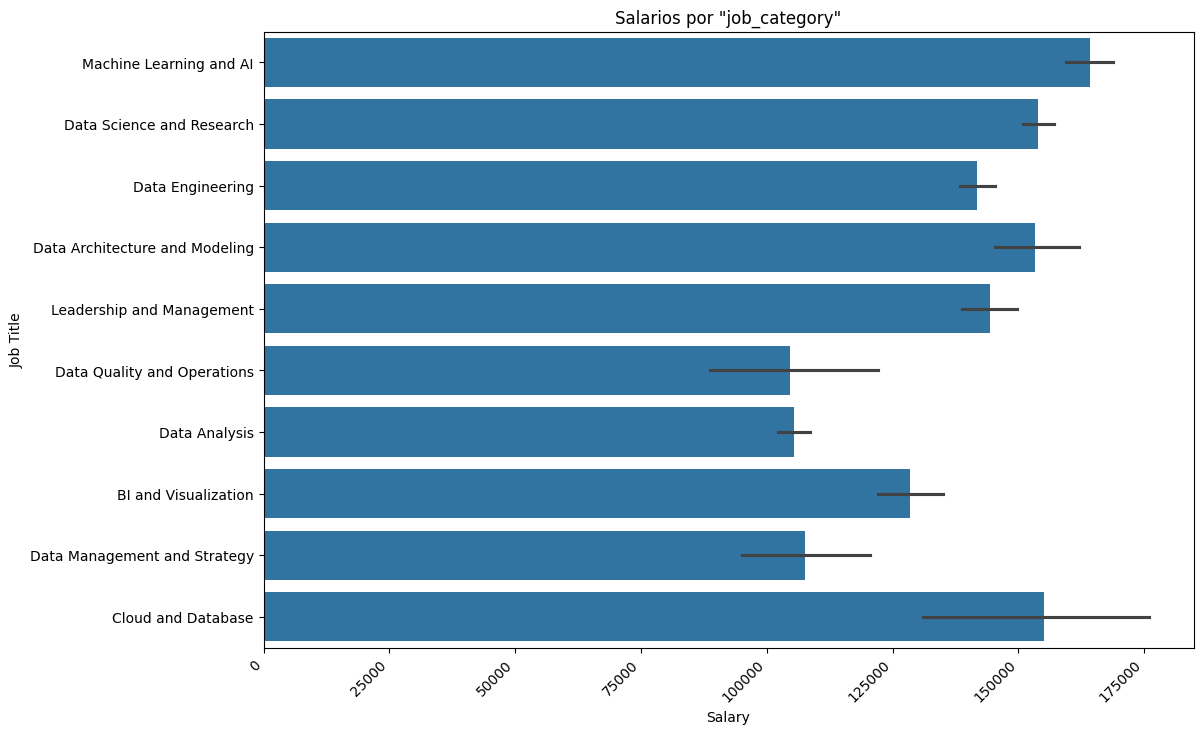

In [ ]:
df_sorted = df.sort_values(by='salary_in_usd', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='salary_in_usd', y='job_category', data=df_sorted)
plt.xlabel('Salary')
plt.ylabel('Job Title')
plt.title('Salarios por "job_category"')
plt.xticks(rotation=45, ha='right')
plt.show()

Comparación de salarios entre títulos de trabajo (Gráfica de caja y bigotes)

<Figure size 1200x800 with 0 Axes>

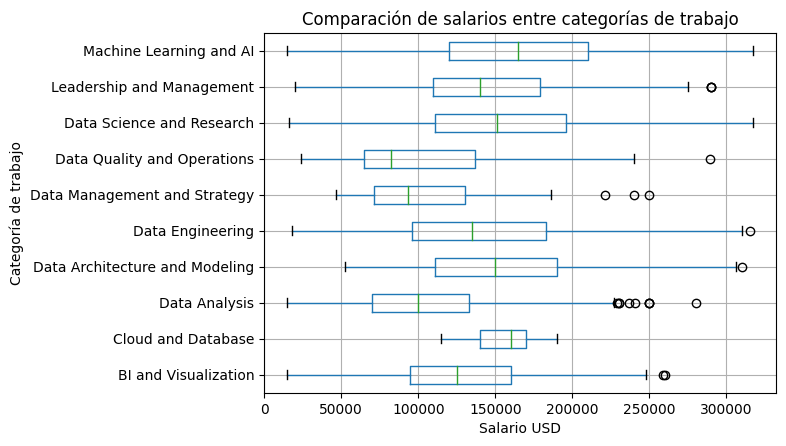

In [ ]:
plt.figure(figsize=(12, 8))
df.boxplot(column='salary_in_usd', by='job_category', vert=False)
plt.xlabel('Salario USD')
plt.ylabel('Categoría de trabajo')
plt.title('Comparación de salarios entre categorías de trabajo')
plt.suptitle('')
plt.show()

## Matriz de correlación

In [ ]:
pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


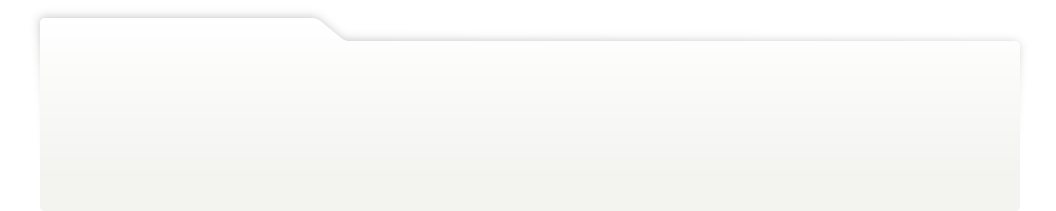
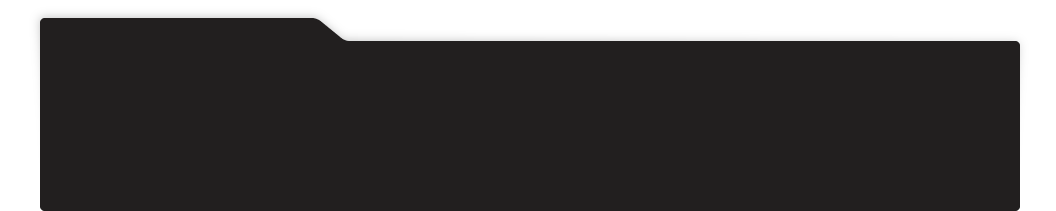
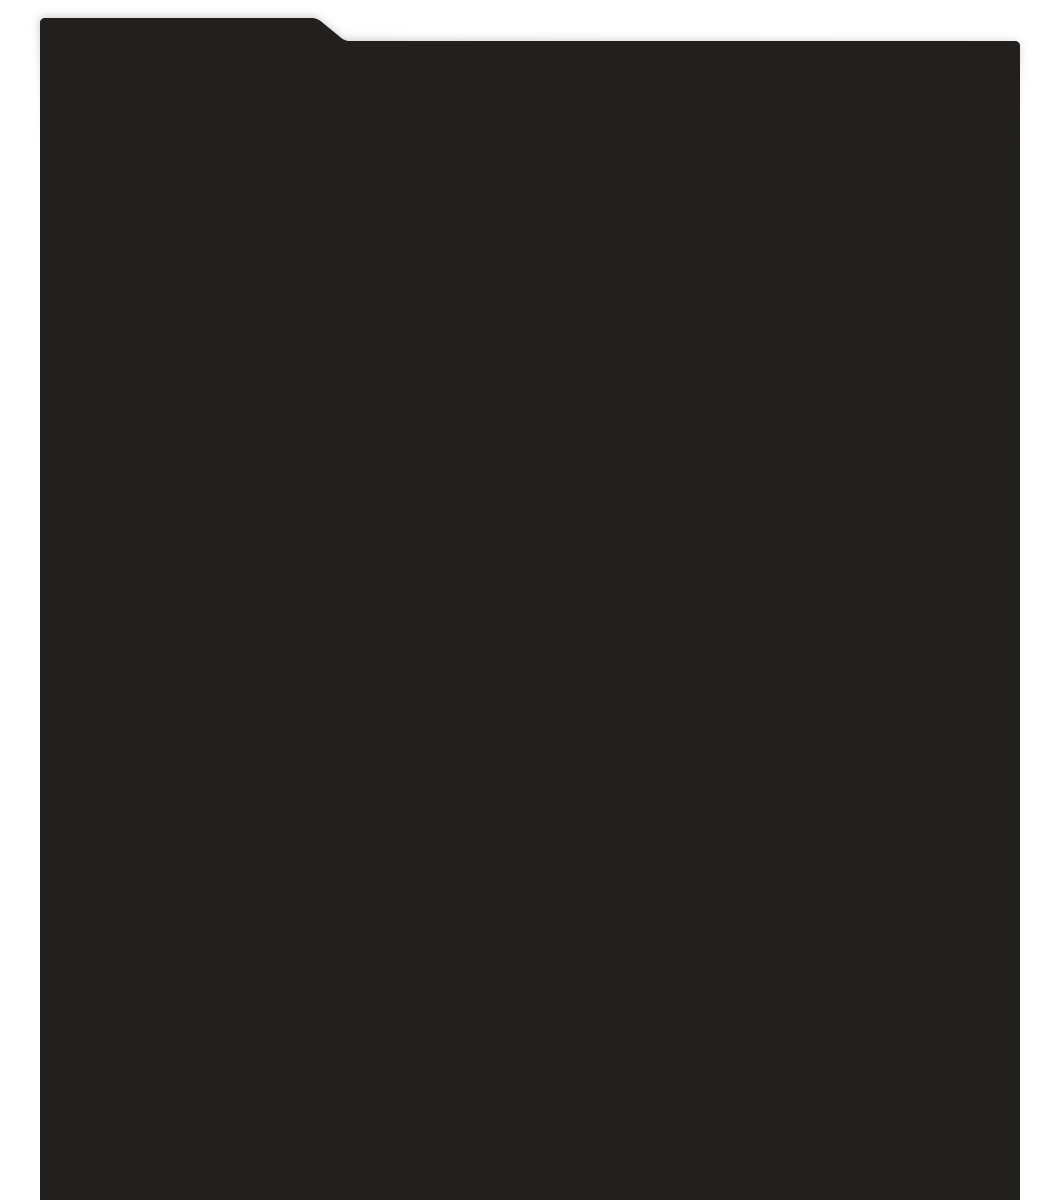
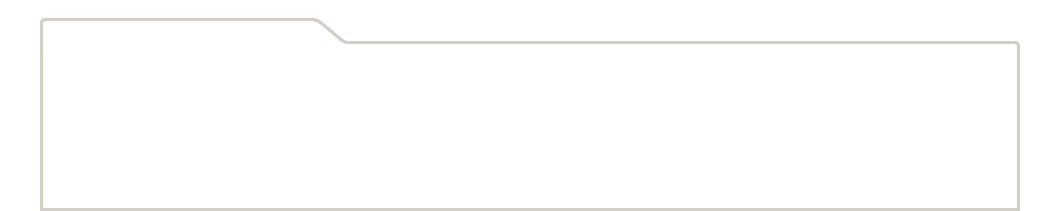
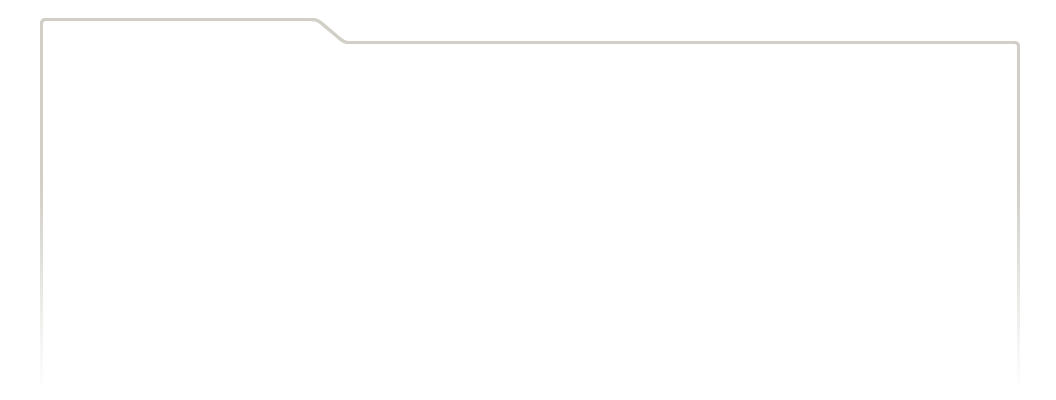
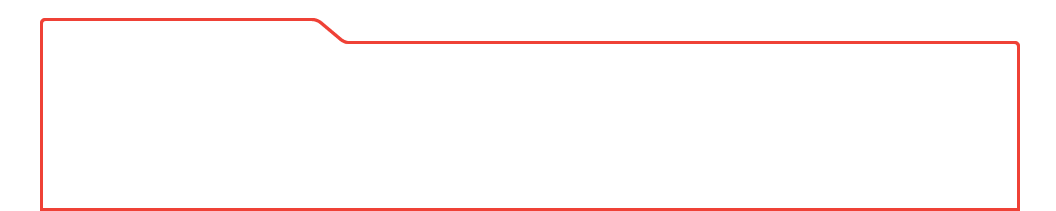
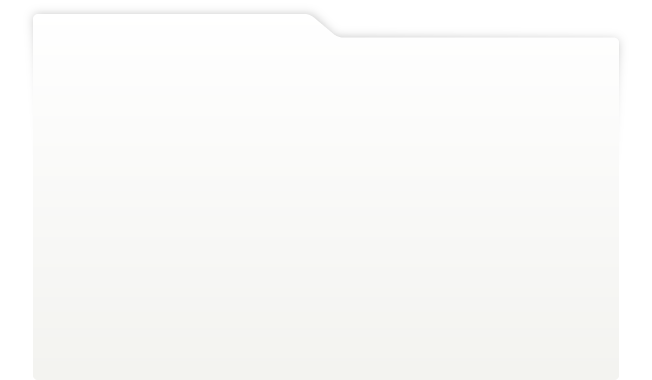
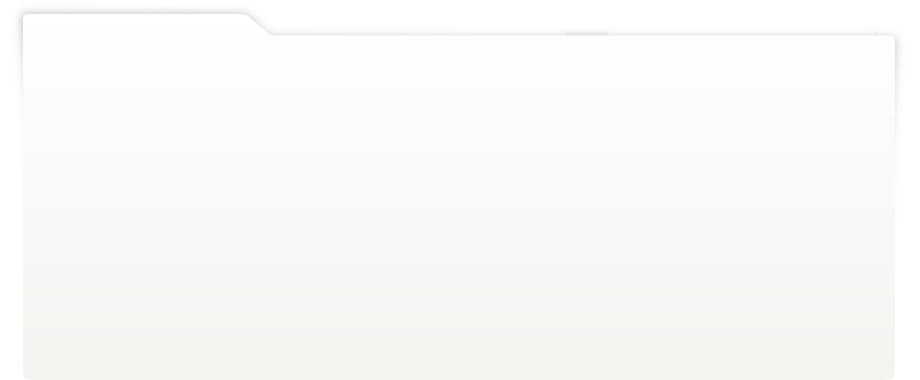
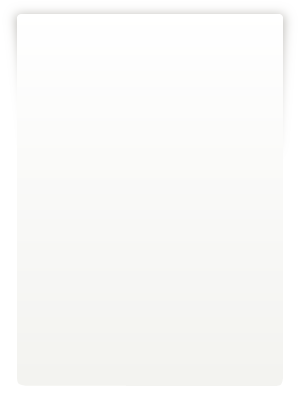
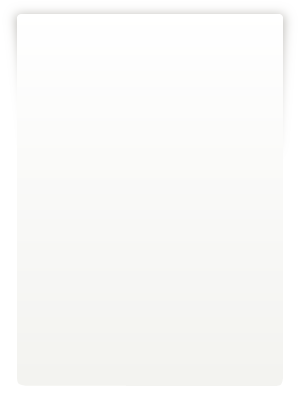
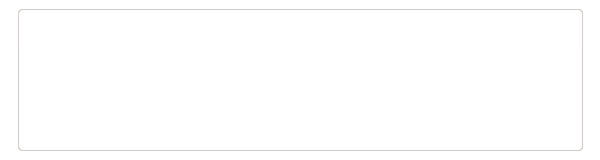
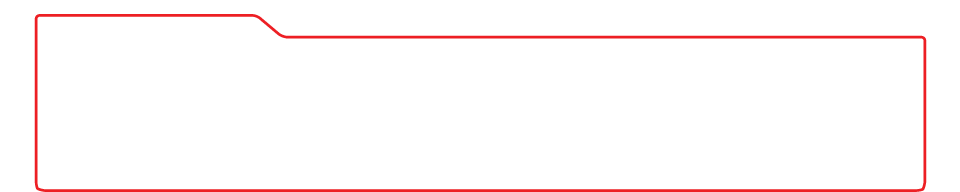
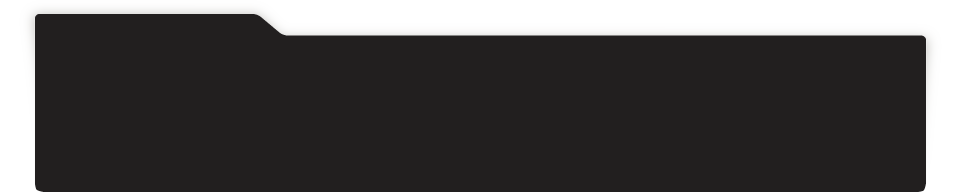
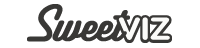
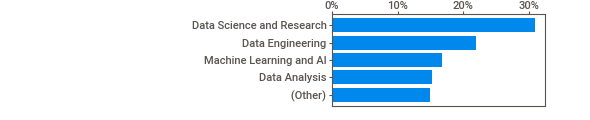
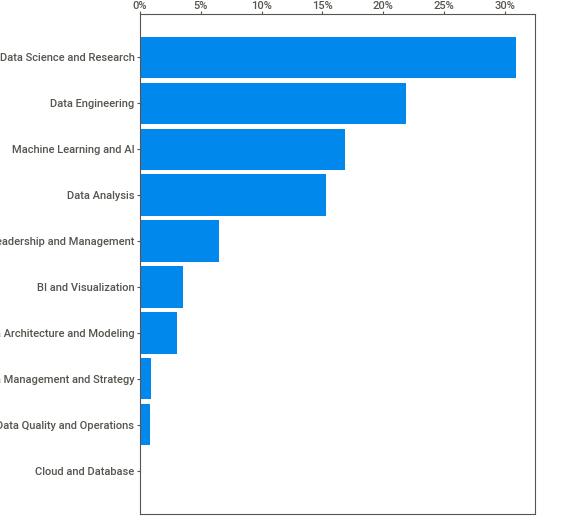
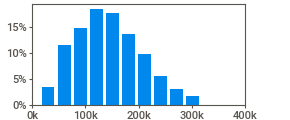
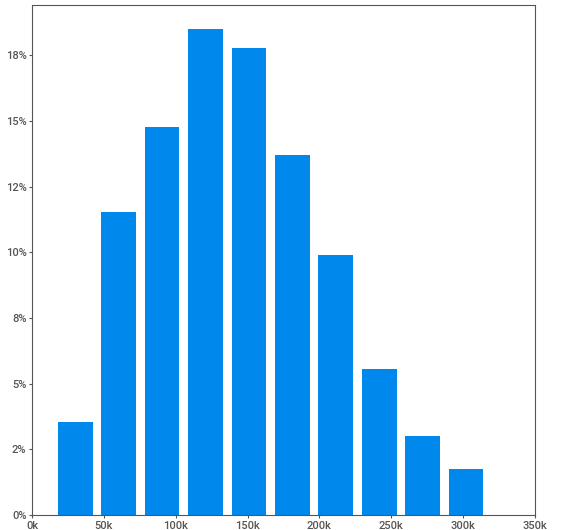
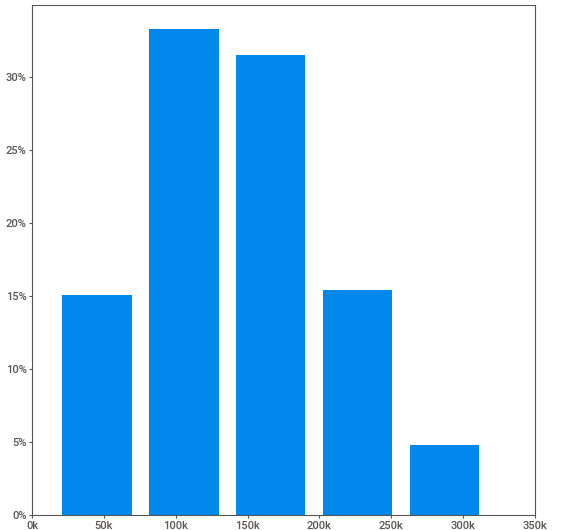
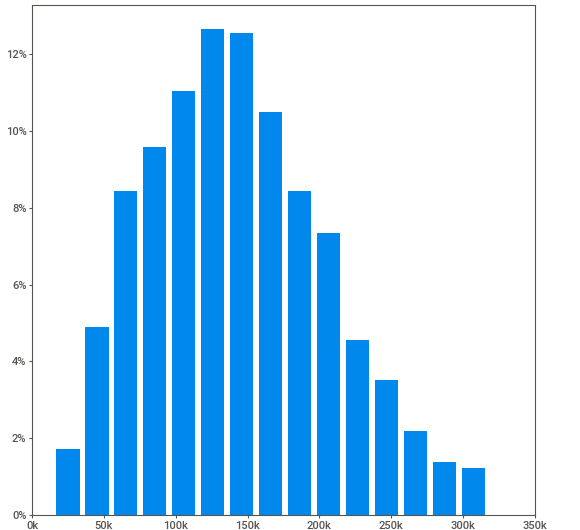
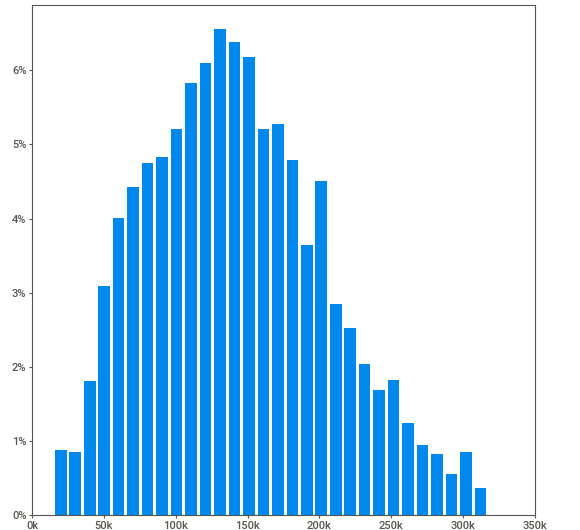
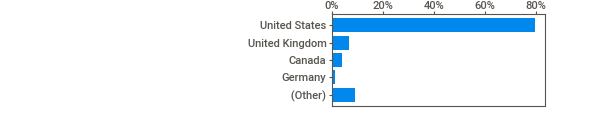
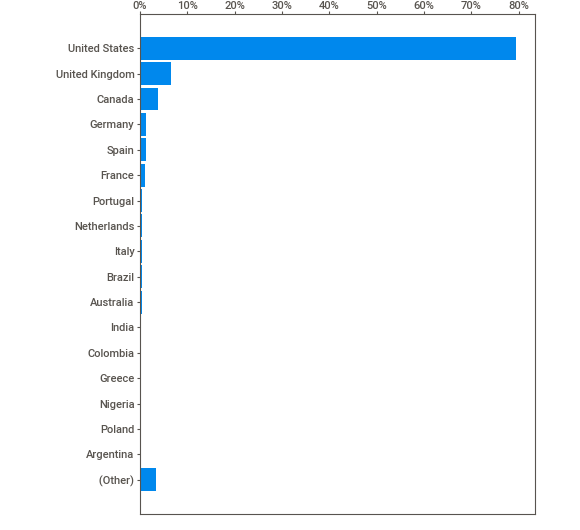
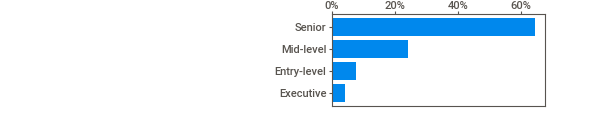
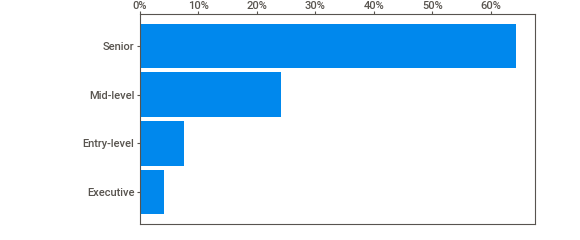
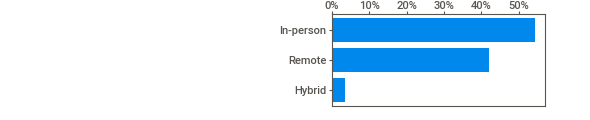
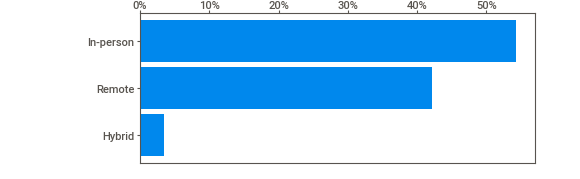
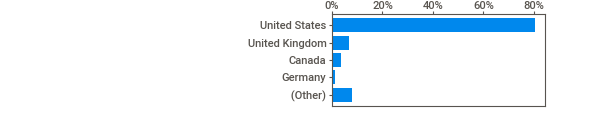
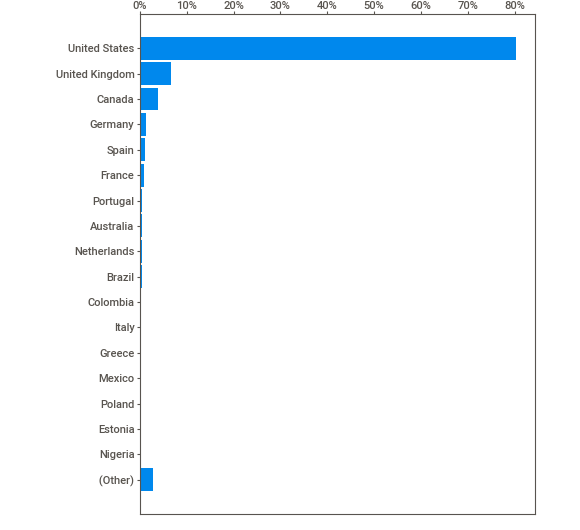
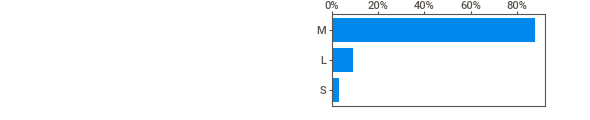
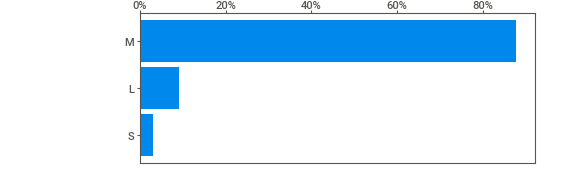
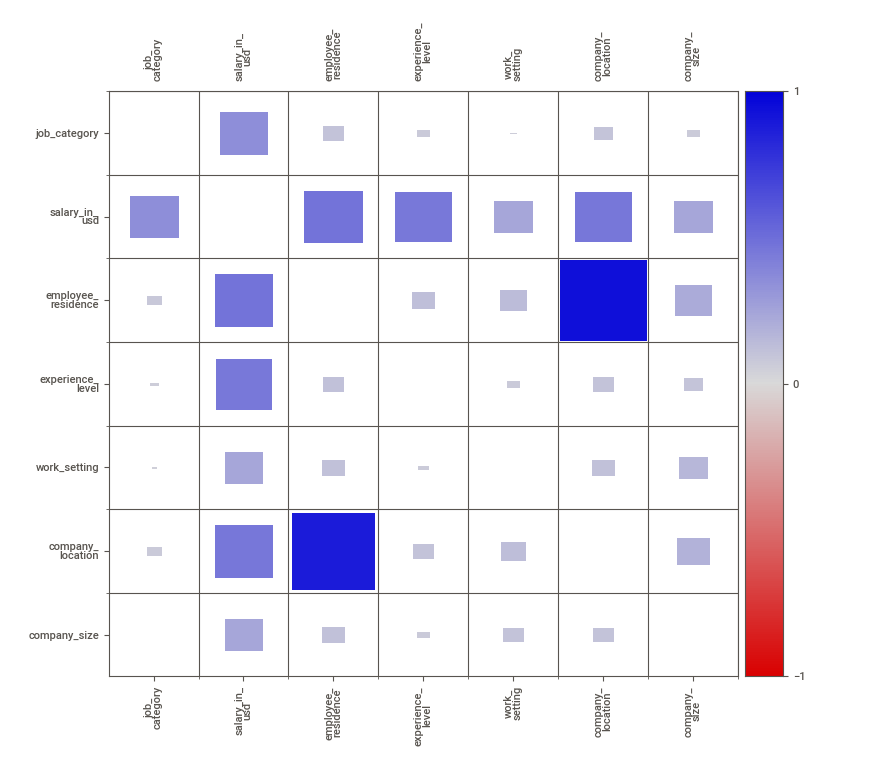
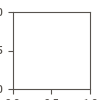

In [ ]:
import sweetviz as sv

reporte = sv.analyze(df)
reporte.show_notebook()

In [ ]:
print('Valores únicos:\nemployee_residence', df.employee_residence.nunique(),'\n', 'company_location',df.company_location.nunique())

Valores únicos:
employee_residence 83 
 company_location 70


In [ ]:
columns_to_remove = ["company_location"]
df = df.drop(columns_to_remove, axis=1)

## Codificación

Codificaremos las variables cualitativas mediante un label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
for column in df.columns:
    if column not in numeric_columns:
      df[column+'encoded'] = label_encoder.fit_transform(df[column])

## Estandarización

Aplicaremos la estadarización:
z = (x - u) / s.

u: media, s: desviación estándar

 a la variable "salary_in_usd"

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df['salary_st'] = scaler.fit_transform(df[['salary_in_usd']])

# Modelos de ML predicción

In [ ]:
df_not_encoding.head()

,salary_in_usd,job_category,employee_residence,experience_level,work_setting,company_location,company_size
0,95012,Data Engineering,Germany,Mid-level,Hybrid,Germany,L
1,186000,Data Architecture and Modeling,United States,Senior,In-person,United States,M
2,81800,Data Architecture and Modeling,United States,Senior,In-person,United States,M
3,212000,Data Science and Research,United States,Senior,In-person,United States,M
4,93300,Data Science and Research,United States,Senior,In-person,United States,M


In [ ]:
exclude_columns = ["salary_in_usd", "company_location", "company_size"];
df_not_encoding[[x for x in df_not_encoding.columns if x not in exclude_columns]]

,job_category,employee_residence,experience_level,work_setting
0,Data Engineering,Germany,Mid-level,Hybrid
1,Data Architecture and Modeling,United States,Senior,In-person
2,Data Architecture and Modeling,United States,Senior,In-person
3,Data Science and Research,United States,Senior,In-person
4,Data Science and Research,United States,Senior,In-person
...,...,...,...,...
5335,Data Engineering,Otros,Mid-level,Hybrid
5336,Otros,United States,Senior,Remote
5338,Data Science and Research,United States,Mid-level,Remote
5339,Data Science and Research,United States,Entry-level,Remote


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separar las características (X) y la variable dependiente (y)
X = df_not_encoding[[x for x in df_not_encoding.columns if x not in exclude_columns]]
y = df_not_encoding['salary_in_usd']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el preprocesador para las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), [x for x in df_not_encoding.columns if x not in exclude_columns])  # drop='first' para evitar multicolinealidad
    ]
)

# Crear el modelo de regresión lineal
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Ajustar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Imprimir los coeficientes del modelo
print("Intercepto:", model.named_steps['regressor'].intercept_)
print("Coeficientes:", model.named_steps['regressor'].coef_)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio:", mse)

# Opcional: Imprimir las predicciones y los valores reales
print("Predicciones:", y_pred)
print("Valores Reales:", y_test.values)

Intercepto: 65776.15944327365
Coeficientes: [ -9097.08943182  23296.529922    22073.8860299   34352.06558932
  15840.61530048  50183.22815948 -11300.97291515 -31899.53568561
 -53098.519054   -67266.38771083 -26089.40435699  15494.32722218
  74790.97962115  18686.16335059  49371.26164166  10970.13135949
   7736.19492978]
Error Cuadrático Medio: 2436466261.8583083
Predicciones: [129280.85380507 175963.94525592 175963.94525592 ... 160451.82926679
 172730.00882621  92639.57971836]
Valores Reales: [ 60000 170730 141525 ...  97500 128000  55368]


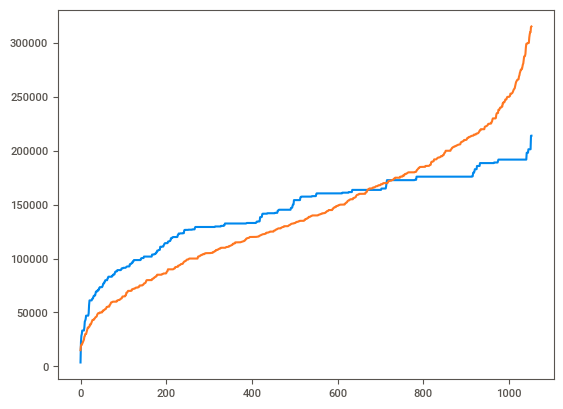

In [ ]:
y_pred.sort()
y_test.values.sort()

plt.plot(list(range(len(y_pred))), y_pred)
plt.plot(list(range(len(y_pred))), y_test.values)

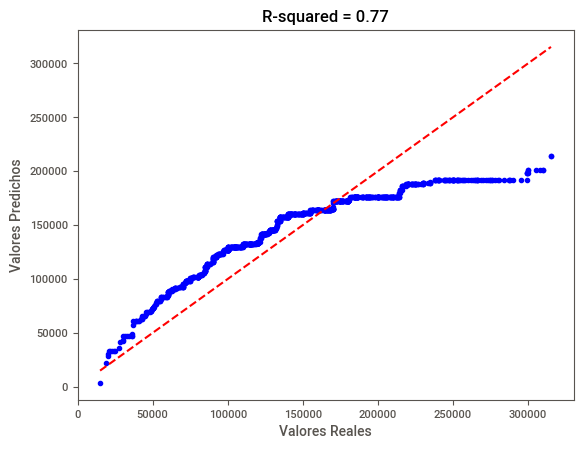

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
y_true = y_test.values

# Calcula el R-squared
r_squared = r2_score(y_true, y_pred)

# Grafica los valores reales vs. predichos
plt.scatter(y_true, y_pred, color='blue')
plt.plot(y_true, y_true, color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'R-squared = {r_squared:.2f}')
plt.show()

# Modelaje

**El objetivo del reto será:**

`Desarrollar un modelo de aprendizaje automático que ayude a un candidato a seleccionar la mejor opción para postularse a un empleo acorde a sus características profesionales.`

Para ello deberemos crear 2 modelos, el primero de ellos será de **clusterización** el cual nos ayudará a encontrar segmentos y características en base a la información como salario, tipo de empleo entre otros.

El segundo modelo será de **clasificación**, una vez obtenidos clusters se entrenará un modelo que clasifique los profesonales en base a sus cualidades y los etiquete en uno de los segmentos que se hayan definido.

In [ ]:
df_model=df[['job_categoryencoded', 'employee_residenceencoded',
       'experience_levelencoded', 'work_settingencoded', 'company_sizeencoded','salary_st']]

## Clusterización

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

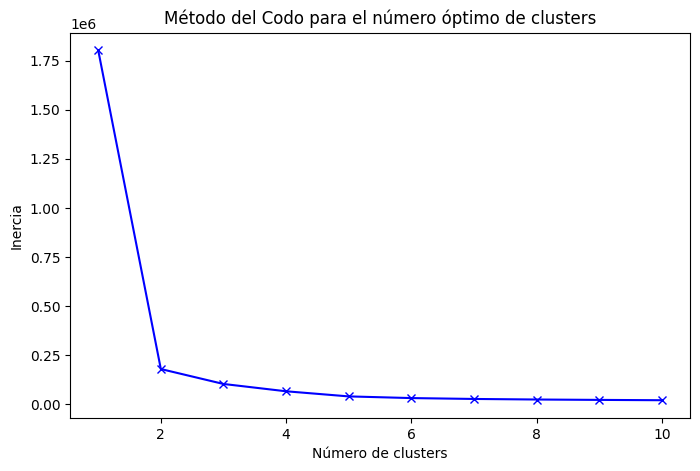

In [ ]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_model)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para el número óptimo de clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

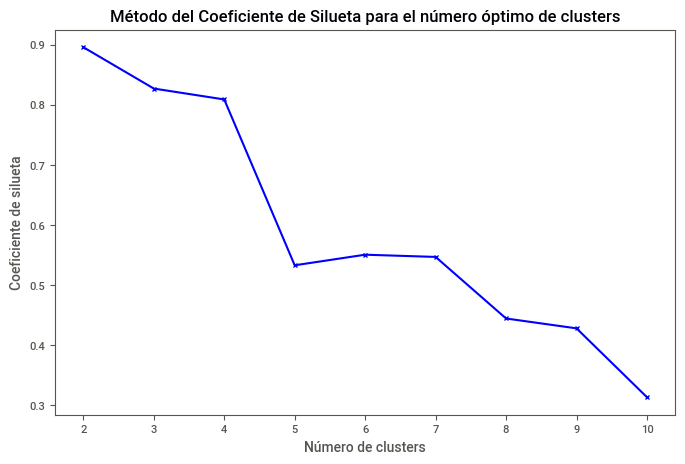

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_model)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df[['job_categoryencoded', 'employee_residenceencoded',
       'experience_levelencoded', 'work_settingencoded', 'company_sizeencoded','salary_st']], labels))

# Graficar el coeficiente de silueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de silueta')
plt.title('Método del Coeficiente de Silueta para el número óptimo de clusters')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [ ]:
kmeans.fit(df_model)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [ ]:
clusters = kmeans.predict(df_model)

In [ ]:
silhouette_avg = silhouette_score(df_model, clusters)
print("Coeficiente de silueta:", silhouette_avg*100)

Coeficiente de silueta: 80.89773619850344


In [ ]:
df['Cluster'] = clusters

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_model)
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

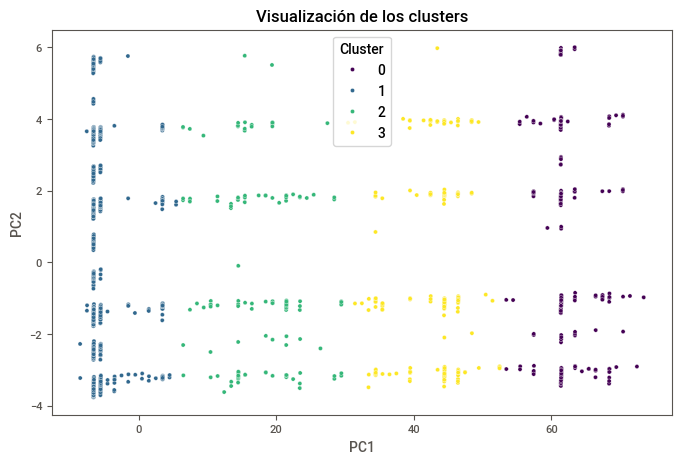

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Visualización de los clusters')
plt.show()

## Clasificación